<a href="https://colab.research.google.com/github/dassatabdi24/Geo-Machine-Learning/blob/master/ShapeFileMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pyshp

     |████████████████████████████████| 225kB 2.8MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=39f542b05b45206f30b2199a926a7ba2d42ec0dc6d8d985eaad470b812a7b17a
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp


In [0]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%matplotlib inline
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
shp_path = "/content/drive/My Drive/Dataset/Comuna.shp"
sf = shp.Reader(shp_path)

In [0]:
len(sf.shapes())

52

In [0]:
sf.records()[1]

Record #1: ['13', '131', '13115', 'REGIÓN METROPOLITANA DE SANTIAGO', 'SANTIAGO', 'LO BARNECHEA']

In [0]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [0]:
df = read_shapefile(sf)
df.shape

(52, 7)

In [0]:
df.head()

,REGION,PROVINCIA,COMUNA,NOM_REGION,NOM_PROVIN,NOM_COMUNA,coords
0,13,131,13114,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,LAS CONDES,"[(-70.47950849099993, -33.36433197899993), (-7..."
1,13,131,13115,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,LO BARNECHEA,"[(-70.32034044899996, -33.105245486999934), (-..."
2,13,131,13132,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,VITACURA,"[(-70.57395151799994, -33.35431785399993), (-7..."
3,13,131,13107,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,HUECHURABA,"[(-70.66311662599998, -33.32923262899993), (-7..."
4,13,131,13124,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,PUDAHUEL,"[(-70.78913731799997, -33.361528721999946), (-..."


In [0]:
df[df.NOM_COMUNA == 'SANTIAGO']

,REGION,PROVINCIA,COMUNA,NOM_REGION,NOM_PROVIN,NOM_COMUNA,coords
25,13,131,13101,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,SANTIAGO,"[(-70.66527655199997, -33.42827810699998), (-7..."


In [0]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

25


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


(-70.6578664226128, -33.44952095786441)

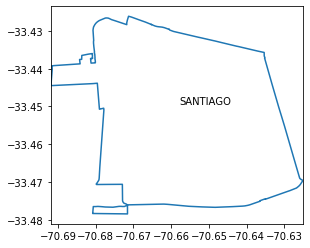

In [0]:
comuna = 'SANTIAGO'
com_id = df[df.NOM_COMUNA == comuna].index.get_values()[0]
plot_shape(com_id, comuna)

In [0]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

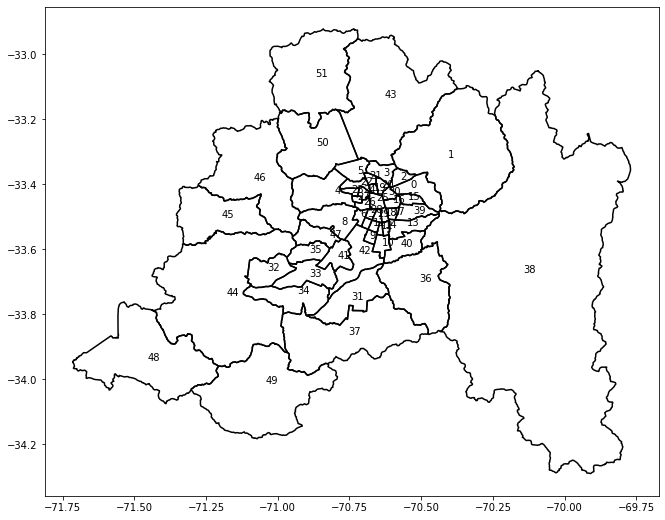

In [0]:
plot_map(sf)

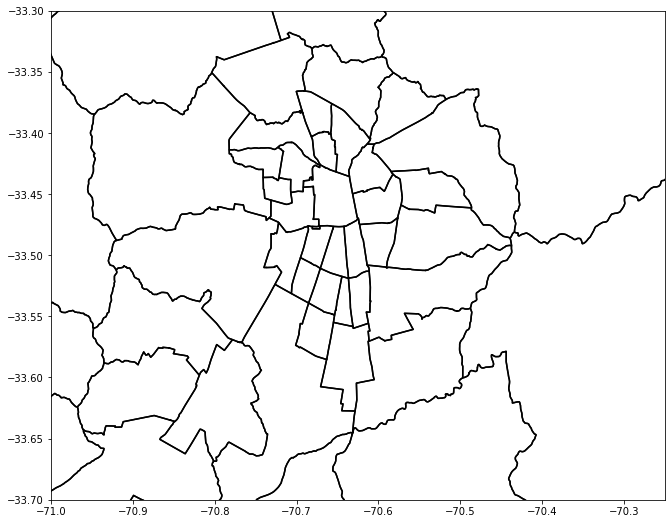

In [0]:
#plotting zoomed map
y_lim = (-33.7,-33.3) # latitude 
x_lim = (-71, -70.25) # longitude
plot_map(sf, x_lim, y_lim)

In [0]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

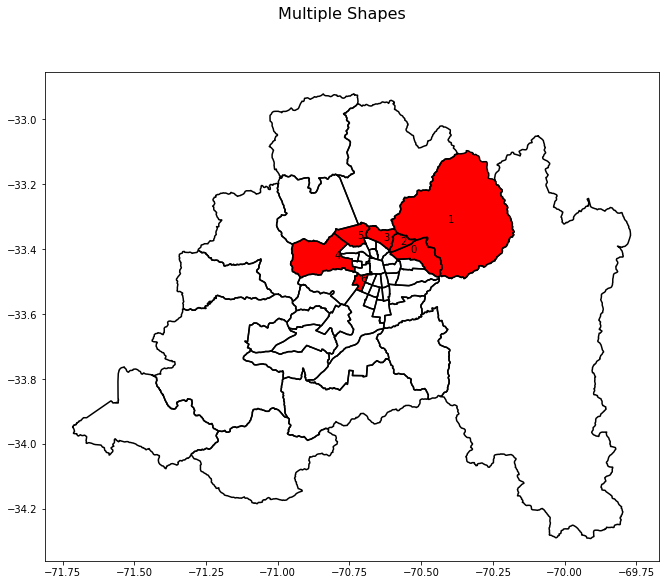

In [0]:
comuna_id = [0, 1, 2, 3, 4, 5, 6]
plot_map_fill_multiples_ids("Multiple Shapes", 
                            comuna_id, sf, color = 'r')